In [68]:
# import the modules
import  pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

### Load the dataset

- Load the train data and using all your knowledge of pandas try to explore the different statistical properties of the dataset.

In [69]:
# read the dataset and extract the features and target separately
train=pd.read_csv("train.csv")
train.head()



,Id,Name,Age,Nationality,Overall,Potential,Club,Value (M),Wage (M),Position
0,17221,F. Burdenski,25,Germany,54,58,Korona Kielce,0.07,0.001,CDM
1,11353,A. Deiola,21,Italy,64,73,Cagliari,0.70,0.010,CM
2,3402,T. Castagne,21,Belgium,72,79,Atalanta,3.70,0.013,RB
3,16071,D. Gorman,21,Northern Ireland,57,66,Stevenage,0.16,0.002,CM
4,12380,N. Molina Lucero,19,Argentina,63,75,Boca Juniors,0.55,0.002,LB


In [79]:
X=train.drop(["Value (M)","Name","Nationality","Club","Position"],axis=1)
y=train["Value (M)"]

X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=6,test_size=0.3)

In [80]:
X_train

,Id,Age,Overall,Potential,Wage (M)
9385,3830,22,72,81,0.007
11254,17167,18,54,68,0.003
4606,2269,31,74,74,0.024
2269,2778,28,73,73,0.001
5841,1128,29,77,77,0.125
...,...,...,...,...,...
8527,6663,35,69,69,0.003
4714,7681,32,68,68,0.021
10196,13042,28,62,64,0.002
8419,15303,19,59,79,0.003


### Visualize the data

- Check for the categorical & continuous features. 
- Check out the best plots for plotting between categorical target and continuous features and try making some inferences from these plots.
- Check for the correlation between the features

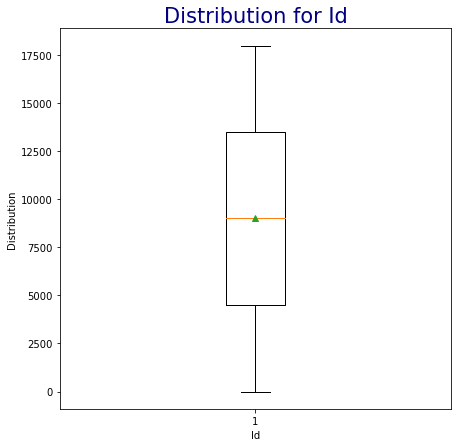

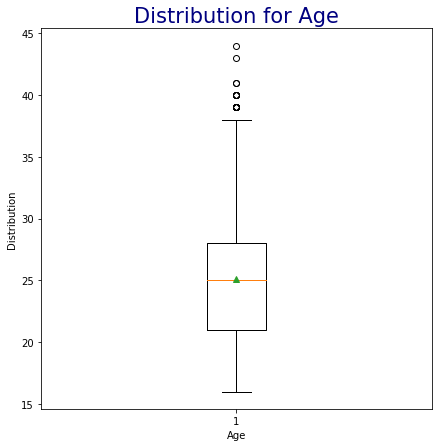

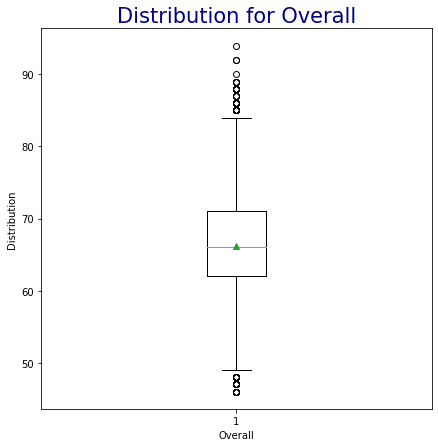

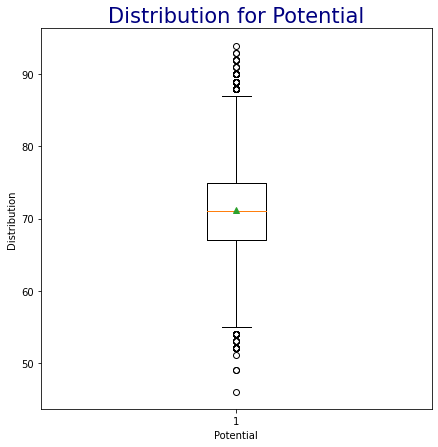

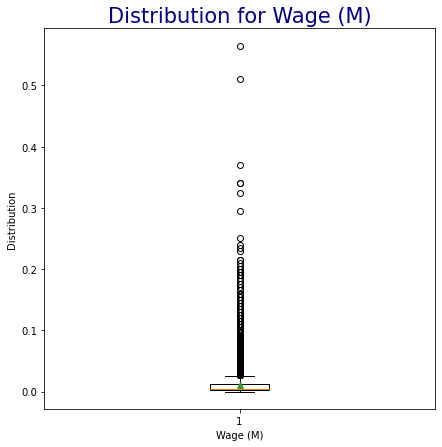

In [84]:
# Code Starts here


def show_boxplot(col_data, x_label, y_label, title, fig_size=(7, 7), show_outliers=True):
    """
    Shows boxplot with means
    
    Params:
    -------
    col_data: list or numpy array
    x_label: str
    y_label: str
    title: str
    fig_size: tupe of (int, int)
    show_outliers: bool
    """
    fig = plt.figure(figsize=fig_size)
    plt.boxplot(col_data, showmeans=True, showfliers=show_outliers)
    plt.title(title, fontsize=21, color='navy')
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.show()

for col in X_train.select_dtypes(include=np.number).columns:
    x_label = col
    y_label = 'Distribution'
    data = X_train[col]
    title = f'Distribution for {col}'
    show_boxplot(col_data=data, x_label=x_label, y_label=y_label, title=title)


# Code ends here

In [85]:
a=X_train.corr()>0.90
a

,Id,Age,Overall,Potential,Wage (M)
Id,True,False,False,False,False
Age,False,True,False,False,False
Overall,False,False,True,False,False
Potential,False,False,False,True,False
Wage (M),False,False,False,False,True


### Model building

- Separate the features and target and then split the train data into train and validation set.
- Now let's come to the actual task, using linear regression, predict the `Value (M)`. 
- Try improving upon the `r2_score` (R-Square) using different parameters that give the best score. You can use higher degree [Polynomial Features of sklearn](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html) to improve the model prediction. 



In [88]:
# Code Starts here

regressor=LinearRegression()
regressor.fit(X_train,y_train)
y_pred=regressor.predict(X_test)
r2=r2_score(y_pred,y_test)
print(r2)






# Code ends here

0.74142874985314


### Prediction on the test data and creating the sample submission file.

- Load the test data and store the `Id` column in a separate variable.
- Perform the same operations on the test data that you have performed on the train data.
- Create the submission file as a `csv` file consisting of the `Id` column from the test data and your prediction as the second column.

In [102]:
# Code Starts here

test=pd.read_csv("test.csv")
test.drop(["Name","Nationality","Club","Position"],axis=1,inplace=True)
id=test[['Id']]
y_pred_1=regressor.predict(test)
y_pred_1
id["Value (M)"]=y_pred_1
id

id.to_csv("sample_submission_1.csv", encoding='utf-8', index=False)
id





# Code ends here

<ipython-input-102-f8d5ec570329>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  id["Value (M)"]=y_pred_1


,Id,Value (M)
0,280,12.653846
1,569,19.784518
2,8731,2.649253
3,10085,0.466158
4,9831,0.930528
...,...,...
3592,5584,0.702920
3593,4629,4.105678
3594,6123,0.778713
3595,664,13.383639
